#  US ACCIDENT EXPLORATORY ANALYSIS

Information about US Accidents ,To prevent accidents

## Download Dataset

In [2]:
# Data --> https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/code

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation and Cleaning

In [4]:
df=pd.read_csv('US_Accidents_March23.csv')

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
len(df.columns)

46

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [10]:
#We are finding the columns which are numerical

numerics = ['int16','int32','int64','float16','float32','float64']
new_df = df.select_dtypes(include=numerics)
len(new_df.columns)

13

In [11]:
#not empty -->false
df.isna()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7728392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#sum of missing values


df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [13]:
df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [14]:
## Percentage

missing_percentages=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [15]:

#have missing values
missing_percentages[missing_percentages!=0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

In [16]:
type(missing_percentages)

pandas.core.series.Series

<Axes: >

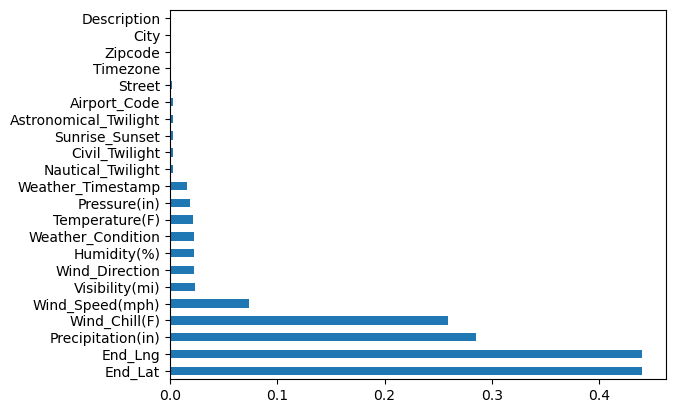

In [17]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [ ]:
#Remove columns that you dont want to use


## Exploratory Analysis and Visualisation

In [18]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### CITY

In [19]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [20]:
cities=df.City.unique()

In [21]:
cities

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [22]:
len(cities)

13679

In [23]:
#top cities  by the number of accidents

cities_by_accident = df.City.value_counts()

In [24]:
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [25]:
cities_by_accident.max()

186917

In [26]:
## check Newyork -->because its the most populated city

'New York' in df.City



False

In [27]:
'NY' in df.State

False

<Axes: ylabel='City'>

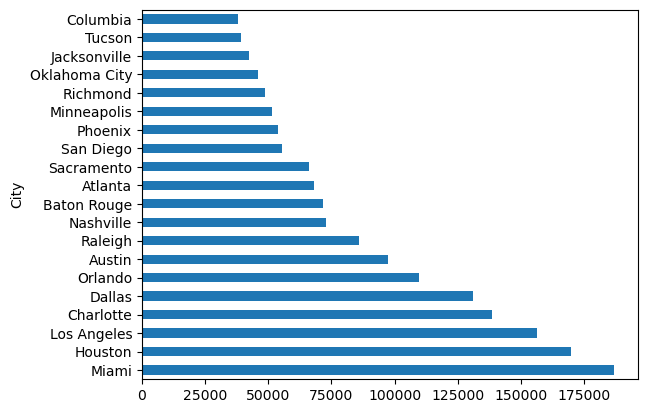

In [28]:
cities_by_accident[:20].plot(kind='barh')

In [29]:
df.groupby(['City']).size().reset_index().rename(columns={0:'cities_by_accident'}).head(20)

,City,cities_by_accident
0,Aaronsburg,21
1,Abbeville,604
2,Abbotsford,21
3,Abbott,33
4,Abbottstown,118
5,Aberdeen,1534
6,Aberdeen Proving Ground,1
7,Abernathy,5
8,Abilene,93
9,Abingdon,1569


In [30]:
sns.set_style('darkgrid')

C:\Users\Srushti\AppData\Local\Temp\ipykernel_2012\3405282844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

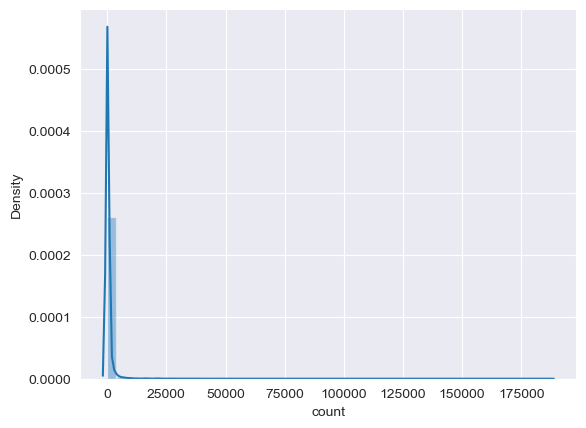

In [31]:
sns.distplot(cities_by_accident)

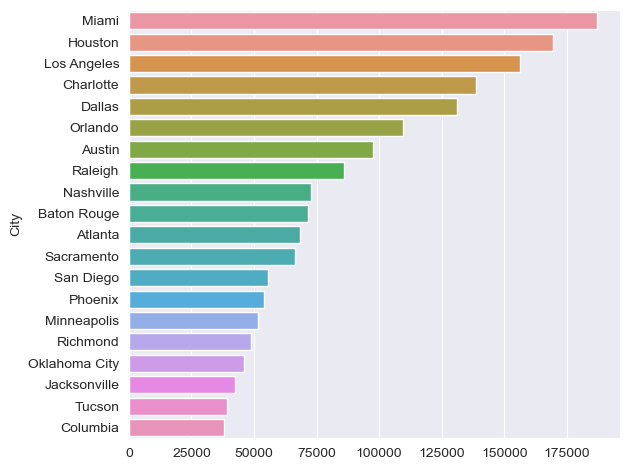

In [32]:
# Let's see it on graph
top_20 = df['City'].value_counts().sort_values(ascending=False).head(20)
sns.barplot(y=top_20.keys(),x=top_20.values)
plt.tight_layout()


In [33]:
cities_by_accident = df['City'].value_counts()
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident  < 1000]


In [34]:
# 8.9% cities have high accidents

len(high_accident_cities)/len(cities_by_accident)

0.08904810644831115

In [35]:
# 91% cities have low accidents
len(low_accident_cities)/len(cities_by_accident)


0.9109518935516888

<Axes: xlabel='count', ylabel='Count'>

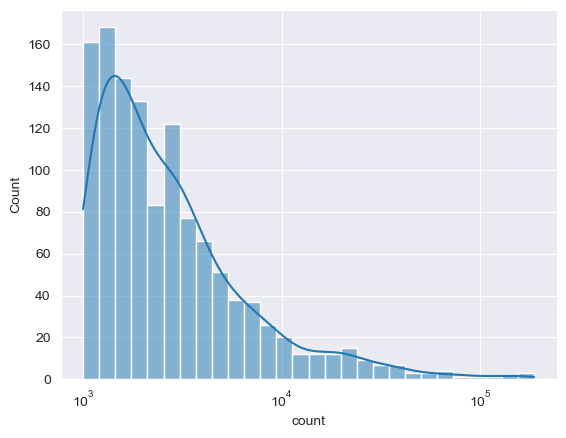

In [36]:
sns.histplot(high_accident_cities,log_scale=True,kde=True)

<Axes: xlabel='count', ylabel='Count'>

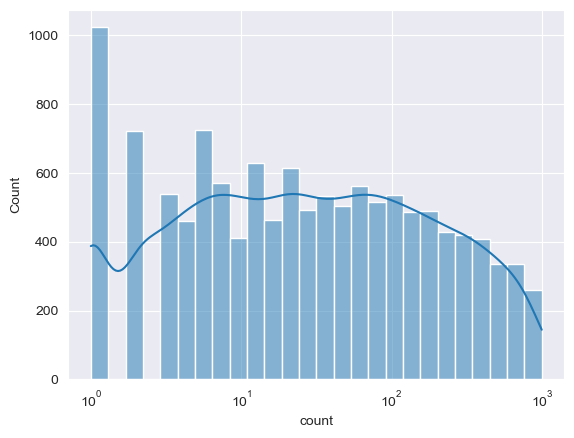

In [37]:
sns.histplot(low_accident_cities,log_scale=True,kde=True)

In [38]:
cities_by_accident[cities_by_accident == 1]


City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

Approximately we have 1023 cities where the accident is reported just 1
It might be an Outlier and one can remove them


### Start Time

In [39]:
# Start time of the accident in morning ,afternoon etc

df['Start_Time'][0]

'2016-02-08 05:46:00'

In [44]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [46]:
df['Start_Time'][0]

Timestamp('2016-02-08 05:46:00')

In [49]:
hour=df['Start_Time'].dt.hour

In [50]:
hour

0           5.0
1           6.0
2           6.0
3           7.0
4           7.0
           ... 
7728389    18.0
7728390    19.0
7728391    19.0
7728392    19.0
7728393    18.0
Name: Start_Time, Length: 7728394, dtype: float64

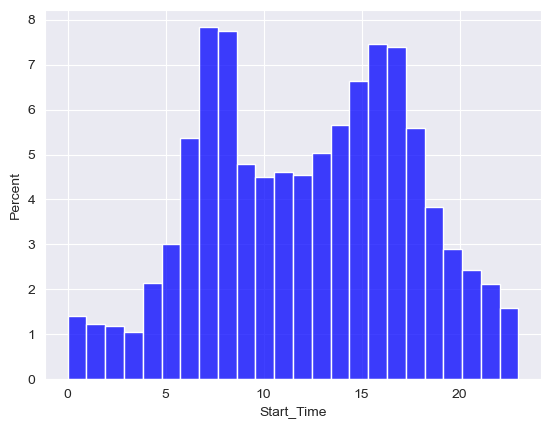

In [61]:
sns.histplot(hour,color='blue',bins=24,stat='percent');

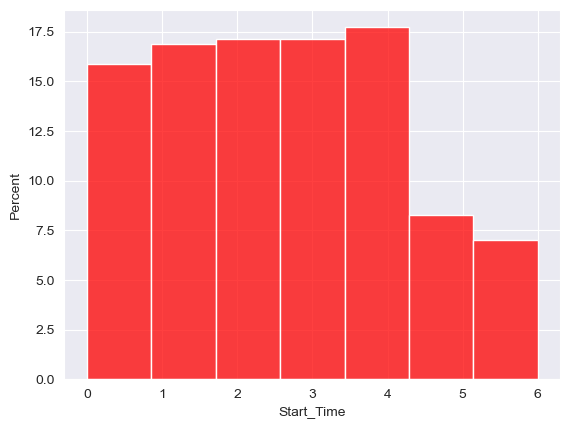

In [63]:
day_of_week =  df['Start_Time'].dt.dayofweek

sns.histplot(day_of_week, color='red', bins=7, stat='percent');


Is the Distribution of accidents by hour the same on weekends as on weekdays?



In [66]:
mondays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 0]




In [67]:
mondays_start_time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7726332   2019-08-19 20:43:02
7726333   2019-08-19 20:41:30
7726696   2019-08-19 22:18:31
7726697   2019-08-19 22:21:28
7726698   2019-08-19 22:31:15
Name: Start_Time, Length: 1108807, dtype: datetime64[ns]

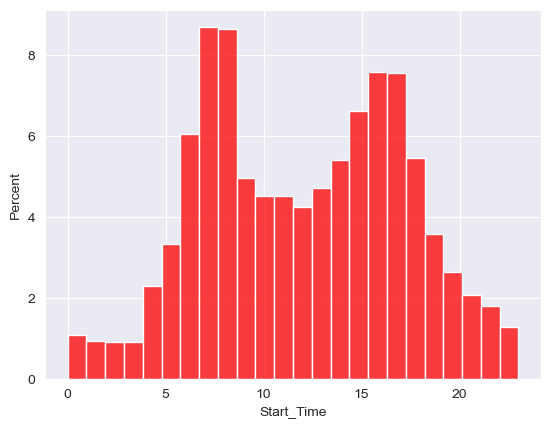

In [68]:
sns.histplot(mondays_start_time.dt.hour, color='red', bins=24, stat='percent');


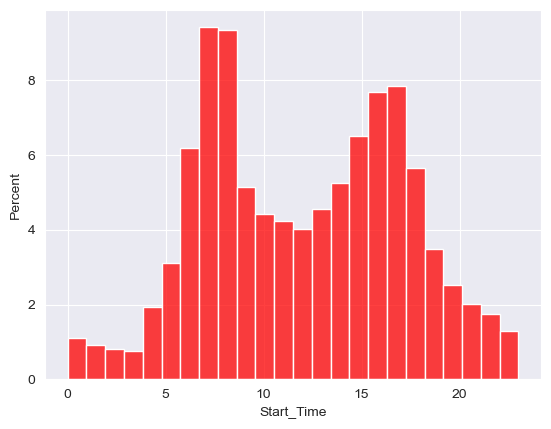

In [69]:
tuesdays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 1]
sns.histplot(tuesdays_start_time.dt.hour, color='red', bins=24, stat='percent');


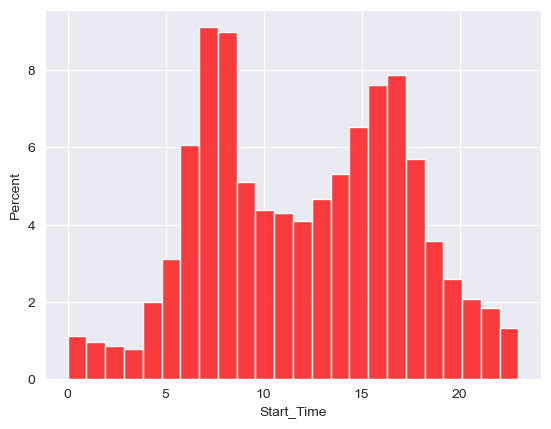

In [70]:
wednesdays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 2]
sns.histplot(wednesdays_start_time.dt.hour, color='red', bins=24, stat='percent');


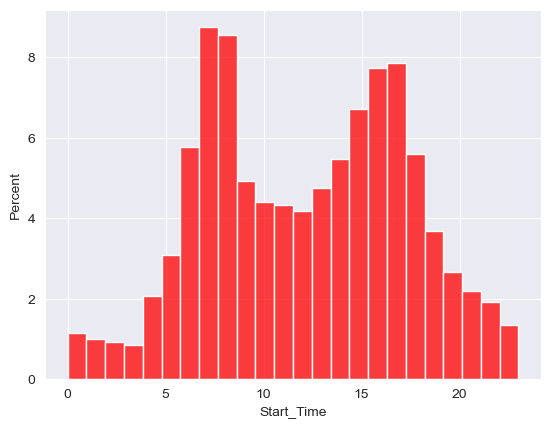

In [71]:
thursdays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 3]
sns.histplot(thursdays_start_time.dt.hour, color='red', bins=24, stat='percent');

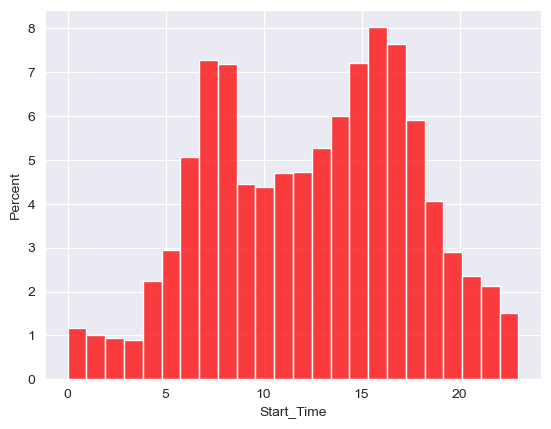

In [72]:
fridays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 4]
sns.histplot(fridays_start_time.dt.hour, color='red', bins=24, stat='percent');


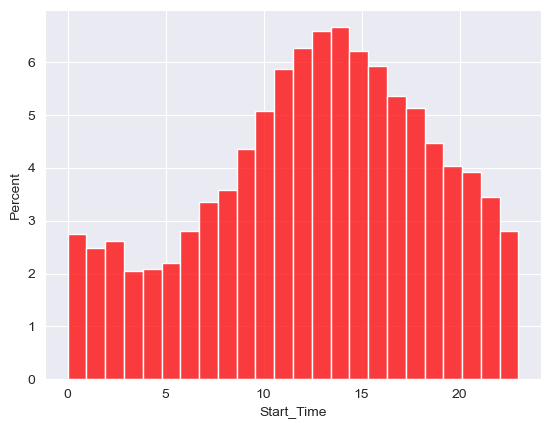

In [73]:
saturdays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 5]
sns.histplot(saturdays_start_time.dt.hour, color='red', bins=24, stat='percent');


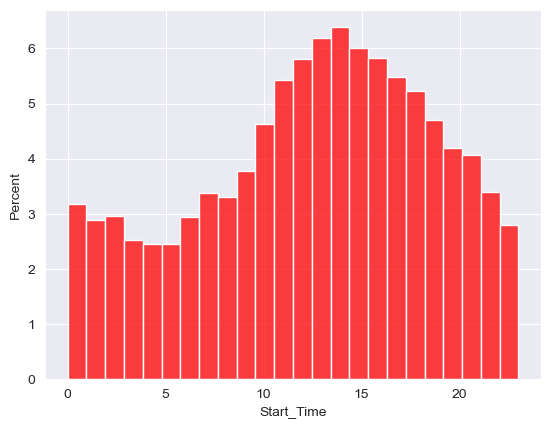

In [74]:
sundays_start_time =df['Start_Time'][df['Start_Time'].dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, color='red', bins=24, stat='percent');


On workings i.e. monday, tuesday, wednesday, thurday, friday you'll find almost the same trend in accidents time.
While on saturday and sunday the is a different trend i.e. from 10 am to 7 pm the frequency of accident is more.


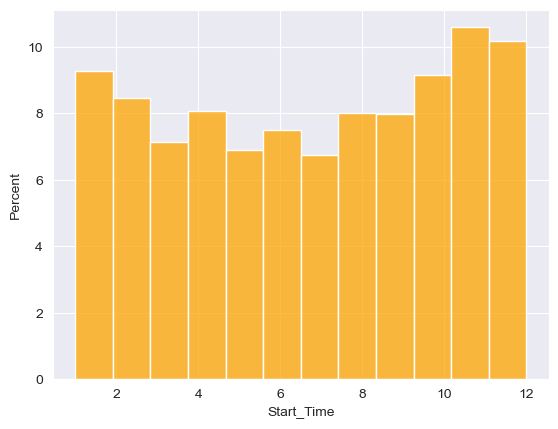

In [75]:
mondays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.month, color='orange', bins=12, stat='percent');


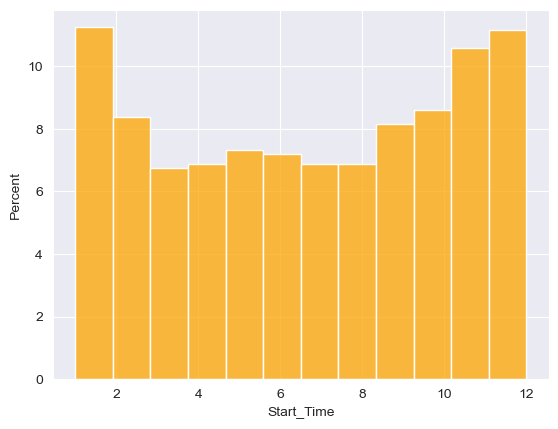

In [76]:
sundays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.month, color='orange', bins=12, stat='percent');


It's seems during summer there are less accidents but as the winter starts the is a increasing trend in accidents.
Year

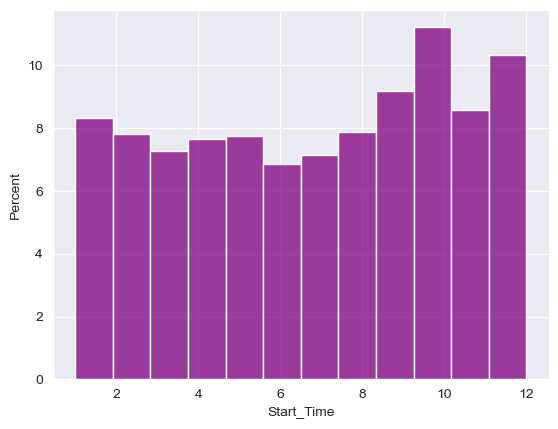

In [77]:
df_2019 = df[df['Start_Time'].dt.year == 2019]
sns.histplot(df_2019['Start_Time'].dt.month, color='purple', bins=12, stat='percent');


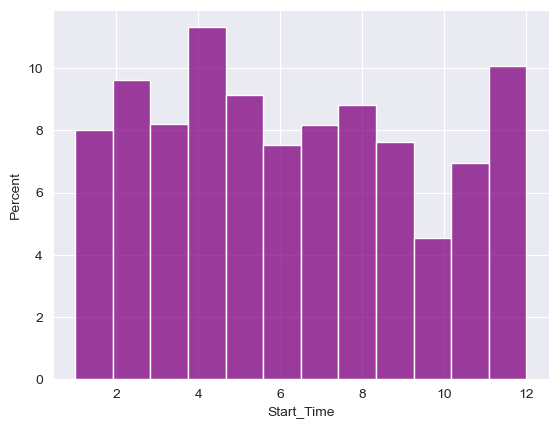

In [78]:
df_2022 = df[df['Start_Time'].dt.year == 2022]
sns.histplot(df_2022['Start_Time'].dt.month, color='purple', bins=12, stat='percent');


### Start Lat,Start lng

In [79]:
df['Start_Lat']

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [80]:
df['Start_Lng']

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

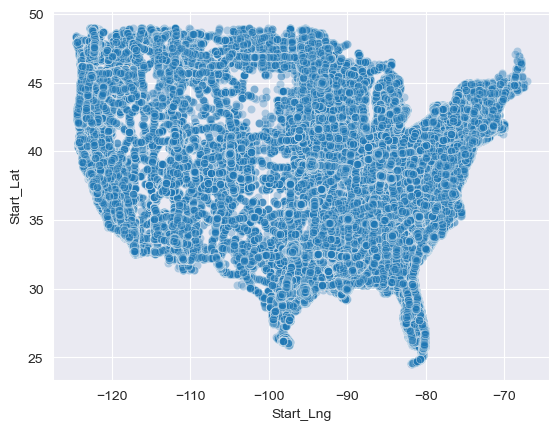

In [85]:
sns.scatterplot(data=df,x='Start_Lng',y='Start_Lat',alpha=0.3);


In [90]:
!pip install folium

import folium

In [91]:
import folium

# zip(list(raw_df.Start_Lat), list(raw_df.Start_Lng))

from folium.plugins import HeatMap

sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)

In [92]:
map

### Conclusion